In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 754.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

In [2]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip customer-segmentation-tutorial-in-python.zip

import pandas as pd

data = pd.read_csv('Mall_Customers.csv')

data.head()

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.59MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from pycaret.clustering import *
s = setup(data, session_id = 123, use_gpu = True)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [4]:
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [5]:
type(exp)


pycaret.clustering.oop.ClusteringExperiment

In [6]:
exp.setup(data, session_id = 123, use_gpu = True)


,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [7]:
kmeans = create_model('kmeans')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4209,260.8046,0.8565,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
models()


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [17]:

create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3920,276.9067,0.8692,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=10, random_state=123)

In [18]:
assign_model(kmeans)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 1
1,2,Male,21,15,81,Cluster 1
2,3,Female,20,16,6,Cluster 1
3,4,Female,23,16,77,Cluster 1
4,5,Female,31,17,40,Cluster 1
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 2
196,197,Female,45,126,28,Cluster 3
197,198,Male,32,126,74,Cluster 2
198,199,Male,32,137,18,Cluster 3


In [19]:
dbscan=create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3691,261.8965,0.9415,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
dbscan_cluster = assign_model(dbscan)
dbscan_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 0
1,2,Male,21,15,81,Cluster 2
2,3,Female,20,16,6,Cluster 0
3,4,Female,23,16,77,Cluster 2
4,5,Female,31,17,40,Cluster 0
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 9
196,197,Female,45,126,28,Cluster 10
197,198,Male,32,126,74,Cluster 9
198,199,Male,32,137,18,Cluster 10


In [21]:
plot_model(kmeans, plot = 'cluster')


In [22]:
plot_model(dbscan, plot = 'cluster')


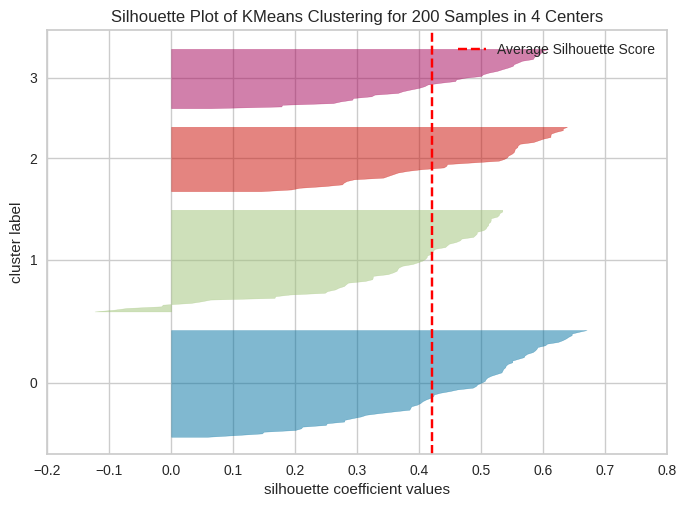

In [24]:
plot_model(kmeans, plot = 'silhouette')

In [25]:
evaluate_model(kmeans)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
evaluate_model(dbscan)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O

In [28]:
save_model(dbscan, 'dbscan_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O

In [29]:
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Age',
                                             'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [30]:
dbscan_pipeline = load_model('dbscan_pipeline')
dbscan_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Age',
                                             'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                ('trained_model', AffinityPropagation())])

In [31]:
save_model(dbscan, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O